У цьому домашньому завданні ми продовжуємо працювати з набором даних `Yulu`, з яким почали працювати в "hw 4.3. Робота з DataFrame. Діаграма розсіювання.". Фокус цього ДЗ в тому, аби будувати візуалізації використовуючи методи бібліотеки `seaborn`. Це дозволяє будувати гарніні візуалізації, а іноді також робити це швидше, ніж з `matplotlib`.

Документація до тої частини бібліотеки, з якою тут працюємо

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів

0. Імпортуйте бібліотеки `matplotlib.pyplot`, `seaborn` та `pandas`.  Завантажте дані з файла `yulu_rental.csv` у `pandas.DataFrame` `df`.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df = pd.read_csv('yulu_rental.csv')

1. Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `humidity` та `count`, зазначивши колір точки в відповідності до значення змінної `weather`. Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

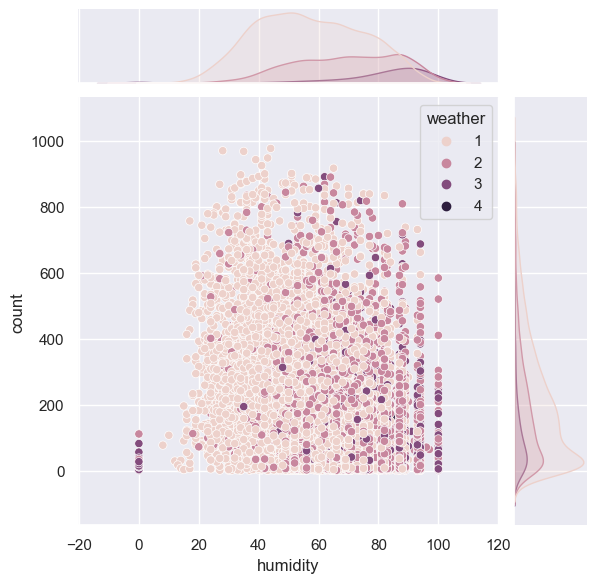

In [9]:
sns.set_theme()
sns.jointplot(data=df, x='humidity', y='count', hue='weather');

З графіка видно чітку залежність count від weather: найбільша кількість велосипедів, взятих в аренду (count) при значенні weather 1, спадає при значеннях 2 та 3, і зовсім відсутнє при 4. Від вологості humidity в цілому значення count не залежить, бачимо можливо помилкові дані при 0.
Також видно, що найчастіше значення count, яке зустрічається - приблизно 50, а далі іде на спад. Отже збільшувати кількість нових велосипедів - зарано і потрібно сфокусуватись на рекламі та просуванні товару.

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=16BksRhZzoz4ynPKCPjXEek56XBsAEF6T)

2. Відфільтруйте і збережіть в окремій змінній лише дані з сезоно "весна" і "літо" (звернітся до опису даних вгорі ноутбуку, аби зрозуміти, які значення вам треба обрати.
Користуючись методом `seaborn.jointplot` побудуйте візуалізацію графіка розсіювання між змінними `casual` та `registered`, зазначивши колір точки в відповідності до значення змінної `season`. Встановіть прозорість на 0.2.

Опишіть свої спостереження з графіку. Що бачите цікавого і корисного для прийняття рішень на основі цих даних?

In [29]:
df_spring_summer = df[(df.season == 1) | (df.season ==2)]
display(df_spring_summer[:3], df_spring_summer[-3:])

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
8148,2012-06-19 21:00:00,2,0,1,1,31.16,35.605,62,11.0014,37,239,276
8149,2012-06-19 22:00:00,2,0,1,1,29.52,34.850,79,6.0032,51,240,291
8150,2012-06-19 23:00:00,2,0,1,1,29.52,34.850,79,8.9981,23,102,125


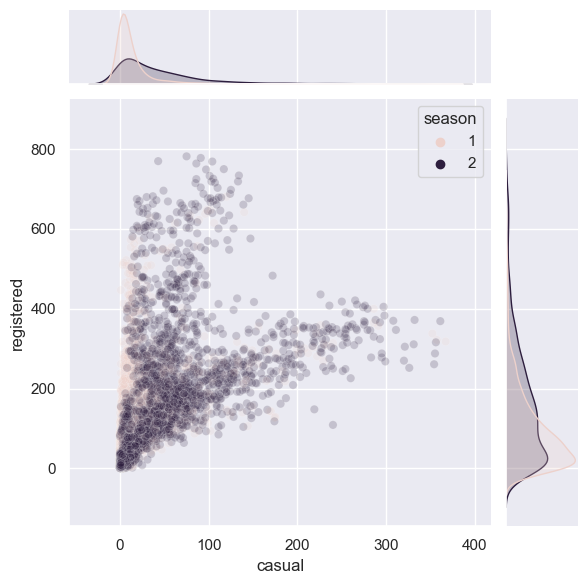

In [33]:
sns.jointplot(data=df_spring_summer, x='casual', y='registered', hue='season', alpha=.2);

З графіку видно, що і casual, і registered більш активно користуються послугами у весняний період(1). 
Можливо на літній період можна використати якусь частину велосипедів в іншій місцевості з кліматичними умовами, наближеними до весняних.

3. Для дослідження як розподілу значень  `humidity` в залежності від погоди (`weather`) побудуйте візуалізацію типу "ящик з вусами" (box plot)користуючись відповідним методом бібліотеки seaborn:

https://seaborn.pydata.org/generated/seaborn.boxplot.html


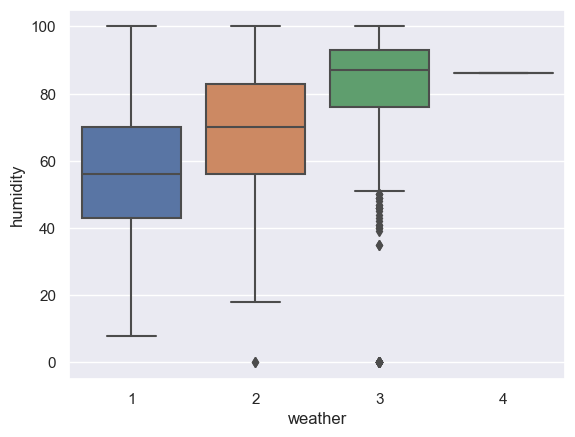

In [35]:
sns.boxplot(data=df, x='weather', y='humidity');

З графіка видно, що значення min, max та медіана параметра humidity зростають із зміною значень weather від 1 до 3. Цікавий графік отримали при weather=4, це може свідчити про досить малу кількість даних з таким значенням.
Також на графіку з weather=3 бачимо чітко виражену асиметрію в сторону значень із вищим показником humidity, і значну кількість викидів

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1_6CBacvDlbuV1XD9GNoGn9sJOSfr74pS)


4. Використайте бібліотеку Seaborn для створення **парних графіків** (pairplot) розсіювання, які показуватимуть взаємозв'язки між кількістю зареєстрованих, неформальних користувачів та загальною кількістю велосипедів, взятих на прокат. Кожен графік повинен розрізняти робочі та святкові дні за кольором.

Для побудови цієї візуалізації спочатку відфільтруйте потрібні колонки в даних і потім зробіть візуалізацію.

Проаналізуйте візуалізацію і скажіть, чи можна виявити особливу поведінку користувачів у святкові дні з цих графіків?

In [37]:
df_workingday = df[['casual', 'registered', 'count', 'workingday']]
df_workingday.head(3)

,casual,registered,count,workingday
0,3,13,16,0
1,8,32,40,0
2,5,27,32,0


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


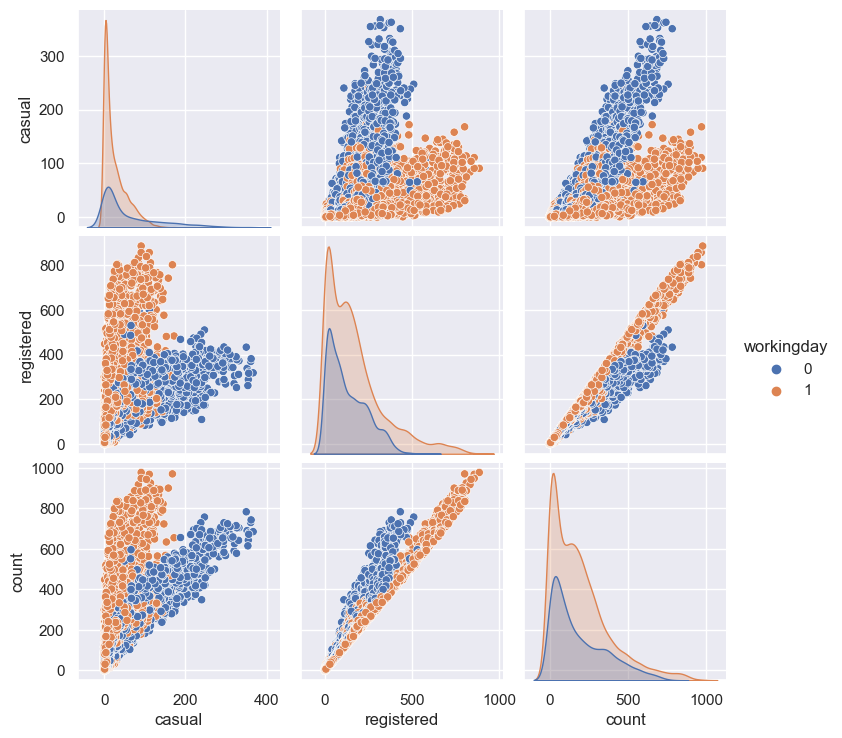

In [39]:
sns.pairplot(data=df_workingday, hue='workingday');

Для всіх категорій користувачів кількість поїздок значно більше у робочі дні, особливо велика різниця у casul. 
Зв'язок між count та registered майже лінійний, особливо в робочі дні (workingday = 1).
Зв'язок між count та casual - нелінійного характеру і особливо це помітно із зростанням значень.

5. Змініть тип даних колонки `datetime` на `pandas.datetime`.

In [40]:
df['datetime'] = pd.to_datetime(df.datetime)

 Тепер давайте візуалізуємо кількість зареєстрованих та казуальних користувачів поденно. Для цього виконайте код нижче і після цього створіть нову змінну `df_viz` яка містить лише колонки `'date', 'registered', 'casual'`, згрупуйте дані за датою і відобразіть на **одному** графіку поденну динаміку двох показників з допомогою `pandas.plot`.

In [41]:
df['date'] = df.datetime.dt.date

In [56]:
df_viz = df[['date', 'registered', 'casual']]
df_viz_group = df_viz.groupby('date')[['registered', 'casual']].sum().reset_index()
df_viz_group.head(5)

,date,registered,casual
0,2011-01-01,654,331
1,2011-01-02,670,131
2,2011-01-03,1229,120
3,2011-01-04,1454,108
4,2011-01-05,1518,82


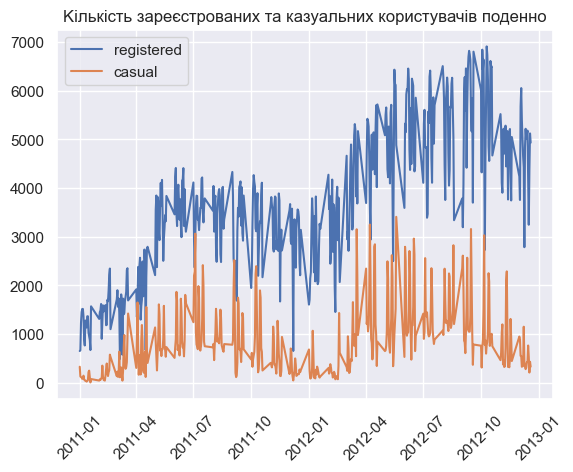

In [61]:
plt.plot('date', 'registered', data=df_viz_group, label='registered')
plt.plot('date', 'casual', data=df_viz_group, label='casual')
plt.xticks(rotation=45)
plt.legend()
plt.title('Kількість зареєстрованих та казуальних користувачів поденно');

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1XGBqmFLXiI_v-MBEOiCQNyW6sUpvII1n)
